In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import timeit
from citipy import citipy
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kapaa us
chumikan ru
bambous virieux mu
albany au
ushuaia ar
gobabis na
sabzevar ir
port elizabeth za
moron mn
taolanaro mg
tual id
ukiah us
chifeng cn
attawapiskat ca
severodvinsk ru
illoqqortoormiut gl
thompson ca
saint-philippe re
qaanaaq gl
vaini to
bredasdorp za
tanabe jp
faanui pf
amursk ru
bambous virieux mu
hasaki jp
mataura pf
belmonte br
rikitea pf
rikitea pf
muros es
black river jm
rikitea pf
tsihombe mg
gleisdorf at
kapaa us
mataura pf
cape town za
kapaa us
hilo us
punta arenas cl
cururupu br
mataura pf
katsuura jp
lorengau pg
hobart au
ushuaia ar
cidreira br
san ramon de la nueva oran ar
mahebourg mu
busselton au
mayumba ga
bur gabo so
punta arenas cl
hobart au
nanortalik gl
cape town za
waingapu id
cape town za
deputatskiy ru
formoso do araguaia br
new norfolk au
mar del plata ar
hamilton bm
qaanaaq gl
castro cl
karratha au
makakilo city us
atuona pf
faanui pf
qaanaaq gl
palabuhanratu id
kapaa us
faanui pf
billings us
khasan ru
tuktoyaktuk ca
puerto ayora ec
mukhanovo ru


severo-kurilsk ru
vestmannaeyjar is
provideniya ru
bluff nz
narsaq gl
rikitea pf
metehara et
esperance au
isangel vu
egvekinot ru
punta arenas cl
vaini to
punta arenas cl
denpasar id
scarborough gb
kaitangata nz
albany au
illoqqortoormiut gl
vastervik se
matagami ca
mataura pf
qaqortoq gl
seoul kr
albany au
rikitea pf
sibolga id
pisco pe
chokurdakh ru
gimli ca
leningradskiy ru
saint-philippe re
hilo us
vanimo pg
qaanaaq gl
hermanus za
hambantota lk
ahipara nz
saundatti yellamma in
muli mv
hervey bay au
hilo us
wenling cn
sentyabrskiy ru
ushuaia ar
airai pw
hithadhoo mv
qaanaaq gl
tambacounda sn
chokurdakh ru
avarua ck
gimli ca
shaoyang cn
morondava mg
butaritari ki
balkhash kz
salinas ec
tromso no
khani ru
shimoda jp
amderma ru
matara lk
san patricio mx
harper lr
punta arenas cl
vaini to
airai pw
mataura pf
albany au
sept-iles ca
busselton au
ushuaia ar
mataura pf
tuktoyaktuk ca
chokurdakh ru
santiago del estero ar
busselton au
puerto ayora ec
cape town za
takoradi gh
belushya guba ru


vostok ru
busselton au
ushuaia ar
rumoi jp
rikitea pf
hambantota lk
faridan ir
play cu vn
albany au
sao filipe cv
broadford gb
broken hill au
raudeberg no
adrar dz
nikolskoye ru
amderma ru
hithadhoo mv
mentok id
ponta do sol cv
kapaa us
mitsamiouli km
arcachon fr
ushuaia ar
chokurdakh ru
arraial do cabo br
hobart au
necochea ar
san matias bo
codrington ag
rikitea pf
estreito br
nehe cn
pisco pe
rikitea pf
ushuaia ar
hobart au
busselton au
dandong cn
wagar sd
bluff nz
barentsburg sj
rikitea pf
nikolskoye ru
tuatapere nz
faanui pf
saint-philippe re
silver city us
cabo san lucas mx
butaritari ki
jamestown sh
kavieng pg
college us
camacupa ao
atuona pf
pangnirtung ca
mys shmidta ru
barrow us
rikitea pf
navashino ru
aden ye
rikitea pf
iqaluit ca
atbasar kz
ilulissat gl
saint-joseph re
mari-turek ru
mahebourg mu
geraldton au
kiama au
chimbarongo cl
castro cl
lata sb
ushuaia ar
carnarvon au
raudeberg no
port alfred za
hingoli in
jamestown sh
illoqqortoormiut gl
klaksvik fo
busselton au
vaini 

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-"*25)

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-------------------------


In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | aguimes
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | sorvag
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | uruzgan
Processing Record 7 of Set 1 | richards bay
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | solnechnyy
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | mandalgovi
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | zhashkiv
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.

#city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [ ]:
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
#city_data_df = city_data_df[new_column_order]
#city_data_df.head(10)

In [ ]:
# Create the output file (CSV).

#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.

#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
city_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Zhuhai,CN,2022-07-17 15:01:15,22.2769,113.5678,88.86,84,40,11.50
1,1,Te Anau,NZ,2022-07-17 15:01:16,-45.4167,167.7167,50.77,90,100,8.97
2,2,Bethel,US,2022-07-17 15:01:16,41.3712,-73.4140,83.19,71,45,1.99
3,3,Seoul,KR,2022-07-17 15:01:17,37.5683,126.9778,76.44,73,16,3.18
4,4,Aktau,KZ,2022-07-17 15:01:17,43.6500,51.2000,84.78,50,0,11.10
5,5,Hermanus,ZA,2022-07-17 15:01:18,-34.4187,19.2345,63.70,71,0,17.83
6,6,Atuona,PF,2022-07-17 15:01:18,-9.8000,-139.0333,77.83,76,23,20.45
7,7,Khatanga,RU,2022-07-17 15:01:18,71.9667,102.5000,59.74,61,100,7.49
8,8,San Juan,AR,2022-07-17 15:00:45,-31.5375,-68.5364,54.05,22,0,11.95
9,9,Bonfim,BR,2022-07-17 15:01:19,3.0833,-59.9500,85.96,64,47,2.98


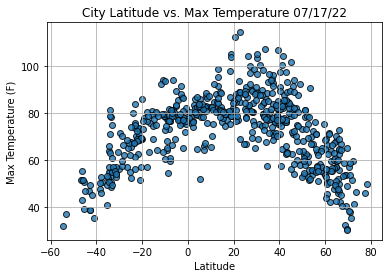

In [11]:
# Build the scatter plot for latitude vs. max temperature.

max_temps = city_data_df["Max Temp"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

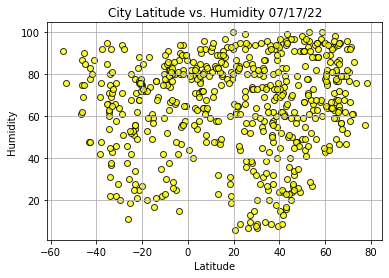

In [12]:
# Build the scatter plot for latitude vs. Humidity.

humid = city_data_df["Humidity"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            humid,
            edgecolor="black", color="yellow", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

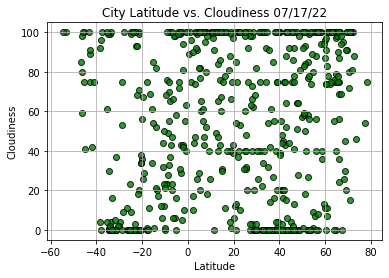

In [13]:
# Build the scatter plot for latitude vs. Cloudiness.
cloud = city_data_df["Cloudiness"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            cloud,
            edgecolor="black", color="green", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

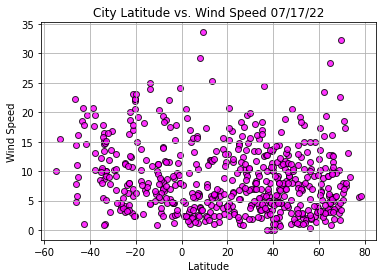

In [16]:
# Build the scatter plot for latitude vs. Wind Speed.
wind = city_data_df["Wind Speed"]
lats = city_data_df["Lat"]

plt.scatter(lats,
            wind,
            edgecolor="black", color="magenta", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [ ]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [ ]:
x = 1
latitudes2 = []
while x < 11:
    random_lat = random.uniform(-90, 89)
    x += 1

In [ ]:
np.random.uniform(-90.000, 90.000, size=50)

In [ ]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

In [ ]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

In [ ]:
# Examples of the (4) most used random functions
random.uniform(-10,10)
random.randrange(-9,9,2)
random.randint(-10,10)
random.random()